In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
import scipy

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [2]:
import glob

rst_list = [f for f in glob.glob("EEG,ECG,EMG/*.txt")]
rst_list

['EEG,ECG,EMG/steptest close eyes.txt',
 'EEG,ECG,EMG/3facial muscle 4 leg muscle.txt',
 'EEG,ECG,EMG/4heart 3 face muscle.txt']

# EEG Data 

In [16]:
EEG = pd.read_csv("EEG,ECG,EMG/steptest close eyes.txt",header=None)
EEG

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,-50831.00,-18980.36,32103.18,22959.33,7605.72,31645.76,-83781.38,-83306.94,-23894.51,...,-17023.36,-20269.46,-23746.31,-23632.19,-40577.63,-39267.90,0.004,0.376,0.33,08:35:40.262
1,1,-11595.48,-10888.23,25482.69,19832.48,663.78,50007.63,-68436.66,-66822.51,28521.14,...,-4915.30,1270.61,29406.98,30277.00,-118607.80,-118261.55,0.000,0.000,0.00,08:35:40.272
2,2,16680.28,16909.43,-26723.50,-25649.05,-18564.11,-179172.41,-185631.41,-185643.13,-15641.95,...,-8401.39,-11034.36,-15261.88,-14984.61,-187500.02,-187500.02,0.000,0.000,0.00,08:35:40.273
3,3,-40755.41,-40046.90,55945.03,50842.37,27867.24,-40633.41,-135502.84,-134282.73,-10747.12,...,-22230.62,-22582.28,-10024.24,-9349.64,-66835.40,-64998.13,0.002,0.576,0.49,08:35:40.274
4,4,30958.24,31560.33,-41942.20,-41960.75,-35357.82,-67598.87,-118622.40,-118230.73,16266.48,...,1516.52,4616.35,16605.91,16908.92,-185823.45,-185821.53,0.000,0.000,0.00,08:35:40.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19025,27,-23859.26,-23115.93,23631.13,19076.90,-21096.87,-1622.51,-187500.02,-187500.02,-40786.99,...,-39666.21,-39746.00,-40351.38,-39977.61,-15319.01,73282.18,0.150,1.006,0.10,08:40:17.178
19026,28,-1201.45,-75.79,6032.36,-5699.38,-6060.94,-24429.72,-69551.02,-69551.01,29735.87,...,27127.33,27563.81,30157.96,31108.35,-92971.34,-89198.45,0.000,0.000,0.00,08:40:17.178
19027,29,10945.58,11240.47,-18047.60,-12353.12,9479.93,-10569.58,-187500.02,-187500.02,-22247.43,...,-21244.21,-21326.00,-21887.30,-21595.58,-155980.89,-19944.91,0.000,0.000,0.00,08:40:17.179
19028,30,-42122.46,-41186.98,53766.00,34433.13,-38894.18,-4587.38,-124424.96,-124425.02,1481.97,...,-367.95,-39.27,1918.99,2828.99,48042.10,40082.76,0.000,0.000,0.00,08:40:17.179


In [17]:
EEG = EEG.loc[: , 1:16]
EEG

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-50831.00,-18980.36,32103.18,22959.33,7605.72,31645.76,-83781.38,-83306.94,-23894.51,-23970.32,-17023.36,-20269.46,-23746.31,-23632.19,-40577.63,-39267.90
1,-11595.48,-10888.23,25482.69,19832.48,663.78,50007.63,-68436.66,-66822.51,28521.14,29350.01,-4915.30,1270.61,29406.98,30277.00,-118607.80,-118261.55
2,16680.28,16909.43,-26723.50,-25649.05,-18564.11,-179172.41,-185631.41,-185643.13,-15641.95,-15704.27,-8401.39,-11034.36,-15261.88,-14984.61,-187500.02,-187500.02
3,-40755.41,-40046.90,55945.03,50842.37,27867.24,-40633.41,-135502.84,-134282.73,-10747.12,-10271.16,-22230.62,-22582.28,-10024.24,-9349.64,-66835.40,-64998.13
4,30958.24,31560.33,-41942.20,-41960.75,-35357.82,-67598.87,-118622.40,-118230.73,16266.48,16542.55,1516.52,4616.35,16605.91,16908.92,-185823.45,-185821.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19025,-23859.26,-23115.93,23631.13,19076.90,-21096.87,-1622.51,-187500.02,-187500.02,-40786.99,-40835.27,-39666.21,-39746.00,-40351.38,-39977.61,-15319.01,73282.18
19026,-1201.45,-75.79,6032.36,-5699.38,-6060.94,-24429.72,-69551.02,-69551.01,29735.87,30050.94,27127.33,27563.81,30157.96,31108.35,-92971.34,-89198.45
19027,10945.58,11240.47,-18047.60,-12353.12,9479.93,-10569.58,-187500.02,-187500.02,-22247.43,-22286.12,-21244.21,-21326.00,-21887.30,-21595.58,-155980.89,-19944.91
19028,-42122.46,-41186.98,53766.00,34433.13,-38894.18,-4587.38,-124424.96,-124425.02,1481.97,1712.72,-367.95,-39.27,1918.99,2828.99,48042.10,40082.76


# Leg vs Face Muscle Relation (Correlation & Regression)

In [10]:
EMG = pd.read_csv("EEG,ECG,EMG/3facial muscle 4 leg muscle.txt",header=None)
EMG

,0,1,2,3,4,5,6,7,8,9
0,0,4.55,7.23,69.16,-509.54,0.0,0.0,0.0,08:37:17.691,1595259437691
1,1,3.12,7.45,57.15,-296.03,0.0,0.0,0.0,08:37:17.706,1595259437706
2,2,-1.91,11.10,69.37,337.57,0.0,0.0,0.0,08:37:17.706,1595259437706
3,3,8.45,14.26,64.95,308.38,0.0,0.0,0.0,08:37:17.721,1595259437721
4,4,1.77,9.96,60.06,-516.09,0.0,0.0,0.0,08:37:17.721,1595259437721
...,...,...,...,...,...,...,...,...,...,...
40478,52,0.00,0.00,-26.73,-12762.19,0.0,0.0,0.0,08:40:40.090,1595259640090
40479,53,0.00,0.00,-58.47,-13072.53,0.0,0.0,0.0,08:40:40.103,1595259640103
40480,54,0.00,0.00,229.88,-13046.72,0.0,0.0,0.0,08:40:40.103,1595259640103
40481,55,0.00,0.00,77.57,-13481.32,0.0,0.0,0.0,08:40:40.104,1595259640104


In [18]:
EMG = EMG.loc[: , 3:4]
EMG

,3,4
0,69.16,-509.54
1,57.15,-296.03
2,69.37,337.57
3,64.95,308.38
4,60.06,-516.09
...,...,...
40478,-26.73,-12762.19
40479,-58.47,-13072.53
40480,229.88,-13046.72
40481,77.57,-13481.32


In [21]:
EMG.corr(method='pearson')

,3,4
3,1.000000,0.034805
4,0.034805,1.000000


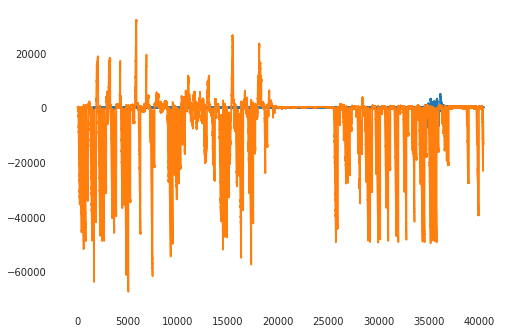

In [30]:
plt.plot(EMG) 


In [35]:

X = np.array(EMG[3]).reshape(-1, 1) 
y = np.array(EMG[4]).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
EMG.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 


0.0012755907170908243


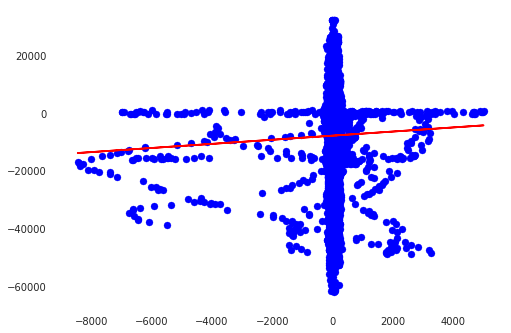

In [39]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='r') 
  
plt.show() 

# Heart vs Face Muscle Relation (Correlation & Regression)

In [13]:
ECG = pd.read_csv("EEG,ECG,EMG/4heart 3 face muscle.txt",header=None)
ECG

,0,1,2,3,4,5,6,7,8,9
0,0,0.0,0.0,-192.44,37.49,0.0,0.0,0.0,06:40:38.965,1595252438965
1,1,0.0,0.0,-183.18,125.61,0.0,0.0,0.0,06:40:38.980,1595252438980
2,2,0.0,0.0,-364.67,178.66,0.0,0.0,0.0,06:40:38.980,1595252438980
3,3,0.0,0.0,-339.72,47.31,0.0,0.0,0.0,06:40:38.994,1595252438994
4,4,0.0,0.0,-193.14,36.50,0.0,0.0,0.0,06:40:38.994,1595252438994
...,...,...,...,...,...,...,...,...,...,...
48141,108,0.0,0.0,-327.40,25.91,0.0,0.0,0.0,06:44:39.702,1595252679702
48142,109,0.0,0.0,-353.38,20.56,0.0,0.0,0.0,06:44:39.703,1595252679703
48143,110,0.0,0.0,-394.88,-95.10,0.0,0.0,0.0,06:44:39.703,1595252679703
48144,111,0.0,0.0,-357.15,-29.71,0.0,0.0,0.0,06:44:39.716,1595252679716


In [19]:
ECG = ECG.loc[: , 3:4]
ECG

,3,4
0,-192.44,37.49
1,-183.18,125.61
2,-364.67,178.66
3,-339.72,47.31
4,-193.14,36.50
...,...,...
48141,-327.40,25.91
48142,-353.38,20.56
48143,-394.88,-95.10
48144,-357.15,-29.71


In [20]:
ECG.corr(method='pearson')

,3,4
3,1.000000,-0.284513
4,-0.284513,1.000000


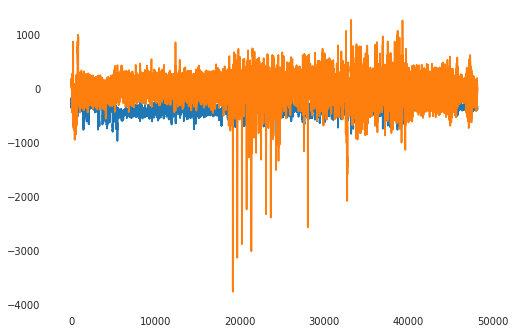

In [29]:
plt.plot(ECG) 


In [50]:

X = np.array(ECG[3]).reshape(-1, 1) 
y = np.array(ECG[4]).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
ECG.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print("Regression Score") 

print(regr.score(X_test, y_test)) 


Regression Score
0.08646439411447815


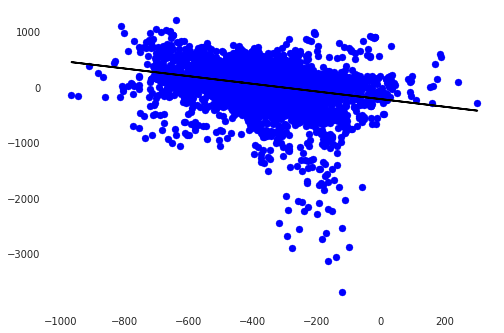

In [34]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 


# EEG vs Facial Muscle

In [47]:
from sklearn import linear_model
import statsmodels.api as sm

X = EEG # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = EMG[3][:19029]
X.dropna(inplace = True) 
Y.dropna(inplace = True) 

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 34.4929663902061
Coefficients: 
 [-8.78169347e-05  2.24381455e-04  1.50316775e-04  4.10905083e-05
 -9.11020072e-05 -8.28047173e-05 -1.08143935e-03  1.11264673e-03
 -2.27785670e-03 -3.65865537e-03  6.01023076e-04 -1.14377284e-03
  9.80288097e-03 -3.30952918e-03 -8.36729288e-05  5.31030534e-05]
                            OLS Regression Results                            
Dep. Variable:                      3   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.753
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           5.29e-07
Time:                        16:24:17   Log-Likelihood:            -1.1500e+05
No. Observations:               19029   AIC:                         2.300e+05
Df Residuals:                   19012   BIC:                         2.302e+05
Df Model:                          16                        

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# EEG vs Leg Muscle

In [48]:
from sklearn import linear_model
import statsmodels.api as sm

X = EEG # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = EMG[4][:19029]
X.dropna(inplace = True) 
Y.dropna(inplace = True) 

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -11245.626405140287
Coefficients: 
 [-0.0043111   0.04421078  0.01951131  0.02067868  0.00501307  0.00975512
  2.78907781 -2.81683313 -1.07290058  2.81387917 -0.23653151  0.41303345
 -2.65044263  0.78567501 -0.03046086  0.03564935]
                            OLS Regression Results                            
Dep. Variable:                      4   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     37.57
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.12e-115
Time:                        16:24:25   Log-Likelihood:            -2.1030e+05
No. Observations:               19029   AIC:                         4.206e+05
Df Residuals:                   19012   BIC:                         4.208e+05
Df Model:                          16                                         
Covariance Type:            nonrobust       

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# EEG vs Heart Data 

In [49]:
from sklearn import linear_model
import statsmodels.api as sm

X = EEG # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = ECG[4][:19029]
X.dropna(inplace = True) 
Y.dropna(inplace = True) 

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 108.56183608566019
Coefficients: 
 [-1.63066739e-04 -7.93137781e-04 -6.50858000e-04 -1.86380919e-04
  2.55007993e-04  2.08585373e-04  2.87015729e-02 -2.85262867e-02
 -1.03850435e-02  1.16106235e-02 -1.91896981e-03  3.20459609e-03
 -5.53526971e-04 -2.19307527e-03  4.63722473e-05 -3.50922152e-05]
                            OLS Regression Results                            
Dep. Variable:                      4   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     24.39
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           2.50e-72
Time:                        16:25:35   Log-Likelihood:            -1.2211e+05
No. Observations:               19029   AIC:                         2.443e+05
Df Residuals:                   19012   BIC:                         2.444e+05
Df Model:                          16                      

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
final = pd.concat([EEG,EMG,ECG],axis=1)
final

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,3,4,3,4
0,-50831.00,-18980.36,32103.18,22959.33,7605.72,31645.76,-83781.38,-83306.94,-23894.51,-23970.32,-17023.36,-20269.46,-23746.31,-23632.19,-40577.63,-39267.90,69.16,-509.54,-192.44,37.49
1,-11595.48,-10888.23,25482.69,19832.48,663.78,50007.63,-68436.66,-66822.51,28521.14,29350.01,-4915.30,1270.61,29406.98,30277.00,-118607.80,-118261.55,57.15,-296.03,-183.18,125.61
2,16680.28,16909.43,-26723.50,-25649.05,-18564.11,-179172.41,-185631.41,-185643.13,-15641.95,-15704.27,-8401.39,-11034.36,-15261.88,-14984.61,-187500.02,-187500.02,69.37,337.57,-364.67,178.66
3,-40755.41,-40046.90,55945.03,50842.37,27867.24,-40633.41,-135502.84,-134282.73,-10747.12,-10271.16,-22230.62,-22582.28,-10024.24,-9349.64,-66835.40,-64998.13,64.95,308.38,-339.72,47.31
4,30958.24,31560.33,-41942.20,-41960.75,-35357.82,-67598.87,-118622.40,-118230.73,16266.48,16542.55,1516.52,4616.35,16605.91,16908.92,-185823.45,-185821.53,60.06,-516.09,-193.14,36.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-327.40,25.91
48142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-353.38,20.56
48143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-394.88,-95.10
48144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-357.15,-29.71


## Signal 3,4 the first one are the leg and facial 
## Signal 3,4 the second pair are the heart and facial 


## this is correlation between EEG, ECG and EMG

In [53]:
final.corr(method='pearson')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,3,4,3,4
1,1.000000,0.950447,-0.932423,-0.858566,0.318782,-0.419618,-0.246531,-0.246466,0.500370,0.485102,0.453643,0.453724,0.445885,0.338124,-0.776314,-0.712109,0.005690,-0.026218,0.075698,-0.040012
2,0.950447,1.000000,-0.941912,-0.862969,0.418946,-0.423420,-0.115319,-0.116095,0.420265,0.413147,0.491494,0.495657,0.406637,0.361385,-0.711552,-0.665037,0.001656,-0.010547,0.038520,-0.022741
3,-0.932423,-0.941912,1.000000,0.925177,-0.326899,0.494107,0.244024,0.244863,-0.366855,-0.354250,-0.393635,-0.388607,-0.331237,-0.261513,0.708453,0.678550,0.004675,0.028926,-0.065714,0.015796
4,-0.858566,-0.862969,0.925177,1.000000,-0.114972,0.430603,0.169612,0.170795,-0.382140,-0.375200,-0.441192,-0.437580,-0.366039,-0.323114,0.694058,0.679898,0.003956,0.025627,-0.056586,0.008021
5,0.318782,0.418946,-0.326899,-0.114972,1.000000,-0.296386,-0.106184,-0.105002,0.008208,0.006199,0.121444,0.112028,0.018395,0.028062,-0.198389,-0.170207,-0.001948,-0.006063,0.027195,-0.019601
6,-0.419618,-0.423420,0.494107,0.430603,-0.296386,1.000000,0.626578,0.627748,0.316208,0.329889,0.194906,0.234729,0.360622,0.411352,0.489532,0.549416,-0.013963,0.047374,-0.081449,0.041222
7,-0.246531,-0.115319,0.244024,0.169612,-0.106184,0.626578,1.000000,0.999949,0.455777,0.481691,0.536950,0.576503,0.556190,0.685914,0.453011,0.303533,-0.013904,0.028253,-0.076737,0.037064
8,-0.246466,-0.116095,0.244863,0.170795,-0.105002,0.627748,0.999949,1.000000,0.457671,0.483543,0.535726,0.575774,0.557746,0.686851,0.452202,0.302316,-0.013715,0.027113,-0.074318,0.035997
9,0.500370,0.420265,-0.366855,-0.382140,0.008208,0.316208,0.455777,0.457671,1.000000,0.999177,0.850112,0.872076,0.986106,0.916882,-0.217360,-0.297162,0.002518,-0.020469,0.063024,-0.033241
10,0.485102,0.413147,-0.354250,-0.375200,0.006199,0.329889,0.481691,0.483543,0.999177,1.000000,0.861257,0.884574,0.991645,0.931161,-0.204256,-0.288563,0.002435,-0.018173,0.056698,-0.031158


# Average EEG vs Facial 

In [55]:

X = np.array(EEG.mean(axis=1)).reshape(-1, 1) 
y = np.array(ECG[4][:19029]).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
ECG.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print("Regression Score") 

print(regr.score(X_test, y_test)) 


Regression Score
0.0015321871565767697


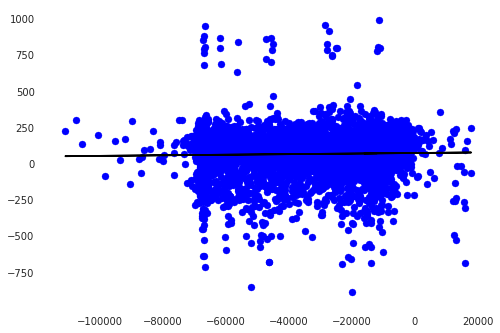

In [56]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 


# Average EEG vs Heart 

In [57]:

X = np.array(EEG.mean(axis=1)).reshape(-1, 1) 
y = np.array(ECG[3][:19029]).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
ECG.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print("Regression Score") 

print(regr.score(X_test, y_test)) 

Regression Score
0.005373220964247083


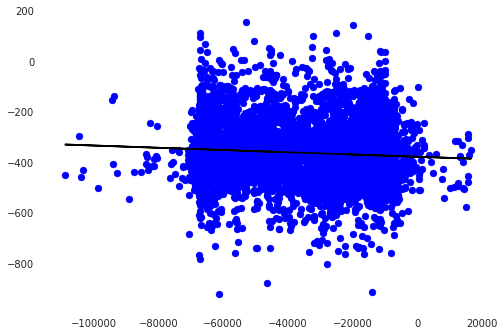

In [58]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 
